<a href="https://colab.research.google.com/github/neerajgoud23/100-of-Machine_learning-/blob/main/Day4_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/wine_data.csv',header=None,usecols=[0,1,2])
df.head()

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [5]:
df.columns=(['Classs label','Alcohol','Malic acid'])

In [6]:
df.head()

,Classs label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

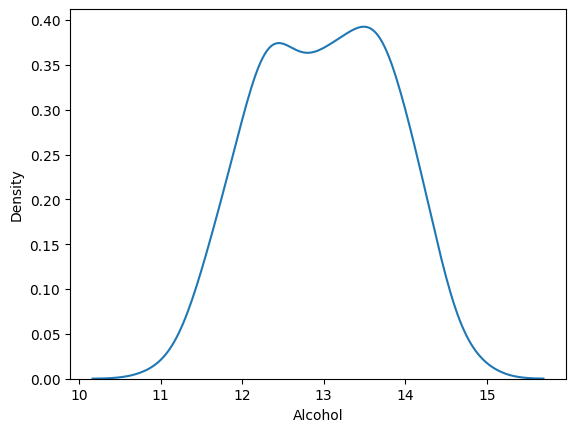

In [7]:
sns.kdeplot(df['Alcohol'])aa

<Axes: xlabel='Malic acid', ylabel='Density'>

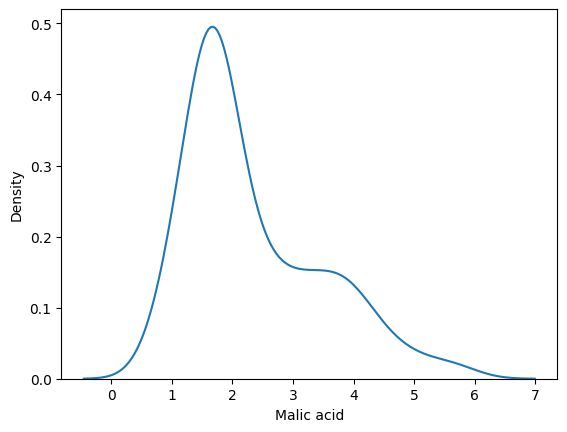

In [8]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

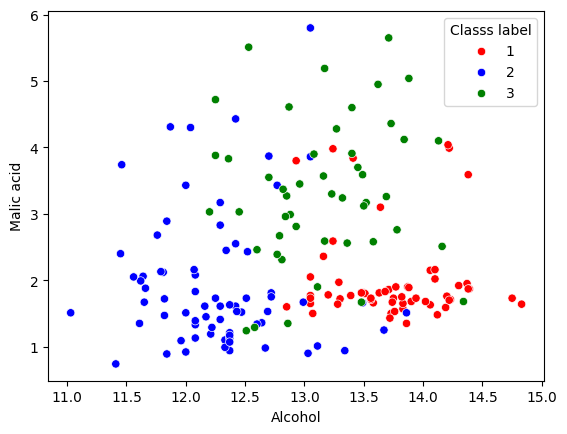

In [13]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x='Alcohol',y='Malic acid',hue=df['Classs label'],palette=color_dict, data=df)

In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train  ,y_test = train_test_split(df.drop('Classs label' , axis=1),df['Classs label'],test_size=0.3,random_state=0)

In [17]:
x_train.shape

(124, 2)

In [18]:
x_train.head()

,Alcohol,Malic acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51


In [20]:
from sklearn.preprocessing import MinMaxScaler
sl = MinMaxScaler()

sl.fit(x_train)
x_train_sl = sl.transform(x_train)
x_test_sl=sl.transform(x_test)

In [21]:
x_test_sl = pd.DataFrame(x_test_sl , columns=x_test.columns)
x_train_sl = pd.DataFrame(x_train_sl,columns=x_train.columns)

In [22]:
x_test_sl

,Alcohol,Malic acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513
5,0.142473,0.243697
6,0.814516,0.264706
7,0.357527,0.617647
8,0.327957,0.176471
9,0.282258,0.197479


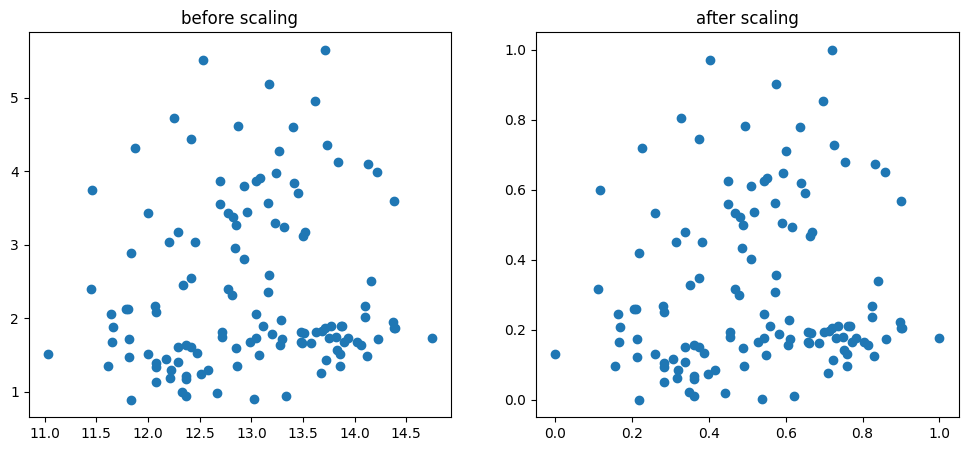

In [23]:
fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('before scaling')
ax1.scatter(x_train['Alcohol'],x_train['Malic acid'])
ax2.set_title('after scaling')
ax2.scatter(x_train_sl['Alcohol'],x_train_sl['Malic acid'])
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_sl = LogisticRegression()

In [26]:
lr.fit(x_train,y_train)
lr_sl.fit(x_train_sl,y_train)


LogisticRegression()

In [27]:
y_pred = lr.predict(x_test)
y_pred_sl=lr_sl.predict(x_test_sl)

In [28]:
from sklearn.metrics import accuracy_score
print("actual", accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_sl))

actual 0.7592592592592593
scaled 0.7962962962962963
